# Assignment 6: Model Evaluation and Model Selection

### Objective: In this assignment, you will gain hands-on experience in evaluating the performance of machine learning models and selecting the best features for your model. The assignment will focus on the following concepts:

- Accuracy evaluation using cross-validation
- Confidence intervals for the accuracy or the error rate
- Hyperparameter tuning using grid search
- Evaluation metrics such as Precision, Recall, and F1-Score, ROC-AUC
- Feature selection methods: Filter methods, Embedded methods, and Wrapper methods
- Feature extraction methods, such as Principal Component Analysis (PCA)

### Dataset:

In this assignment we will use the "Bank Marketing" dataset. This dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe to a term deposit (yes/no). 

The dataset contains 20 input features, such as age, job, marital status, education, and others. The target variable is imbalanced, with the majority of the clients not subscribing to the term deposit.

You can find the Bank Marketing dataset on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

For your convenience, the dataset has been dowloaded and can be found in the Data folder.

## Write Python code to complete each of the tasks below.

### 1. Load the dataset into a Pandas dataframe and show the first five rows.

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('Data/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### 2. Preprocess the data

The dataset contains a combination of numberic and categorical features. The majority of machine learning algorithms work with numeric features. For that reason, we need to convert all our features to numeric by introducing dummy variables using one-hot encoding. We will also normalize the numeric featues to a mean of zero and std of one as most ML algorithms work best with normalized features.

(The solution to this step is given below)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocess categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_features = [col for col in df.columns if col not in categorical_features + ['y']]
print(numeric_features)
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(), categorical_features)])

# # Split into features and targets
# X = df.drop(columns=['y'])
# y = df['y'].map({'no': 0, 'yes': 1})

# # Preprocess the features
# X = preprocessor.fit_transform(X)

# # Get the column names for the one-hot encoded features
# onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

# # Combine the numeric and one-hot encoded feature names
# all_feature_names = numeric_features + list(onehot_columns)

# # Convert the transformed matrix X back into a DataFrame with the feature names. Pandas provides functions for explorarory data analysis.
# X = pd.DataFrame(X, columns=all_feature_names)

# print(X.head())

        age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.980752  0.903952 -0.209228  0.201031 -0.351356     -1.206054   
1 -0.107991  0.350300  0.569634  0.201031 -0.351356      0.649441   
2 -1.465619 -0.116966 -0.598660  0.201031 -0.351356      0.841389   
3 -0.204965 -0.941553  0.180203  0.201031 -0.351356      0.841389   
4  0.667795 -0.780563 -0.598660  0.201031 -0.351356     -0.118350   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0       -1.185448      -1.240939  -1.331707    -0.914779  ...        0.0   
1        0.715193       0.892269   0.711698     0.332862  ...        0.0   
2        1.528273      -0.283172   0.773427     0.836535  ...        0.0   
3        1.528273      -0.283172   0.771697     0.836535  ...        0.0   
4       -0.655478      -0.326707   0.328632     0.398028  ...        0.0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0        0.0              1.0              0.0              0

### 3. Perform and Exploratory Data Analysis

1. Display a histogram of each feature so we can see the distribution of their values.
2. Use Seaborn to display a barplot of the correlation of each feature with the target variable.

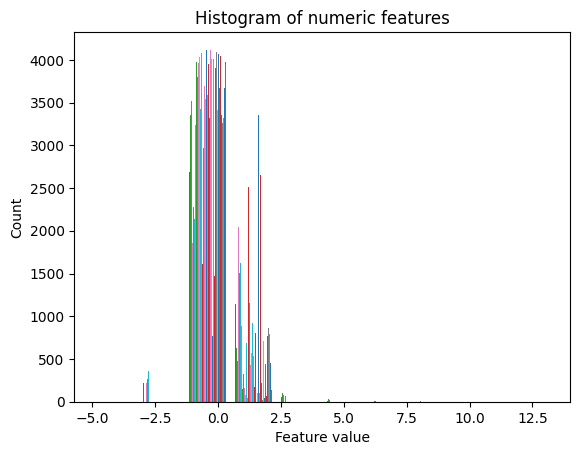

<AxesSubplot: >

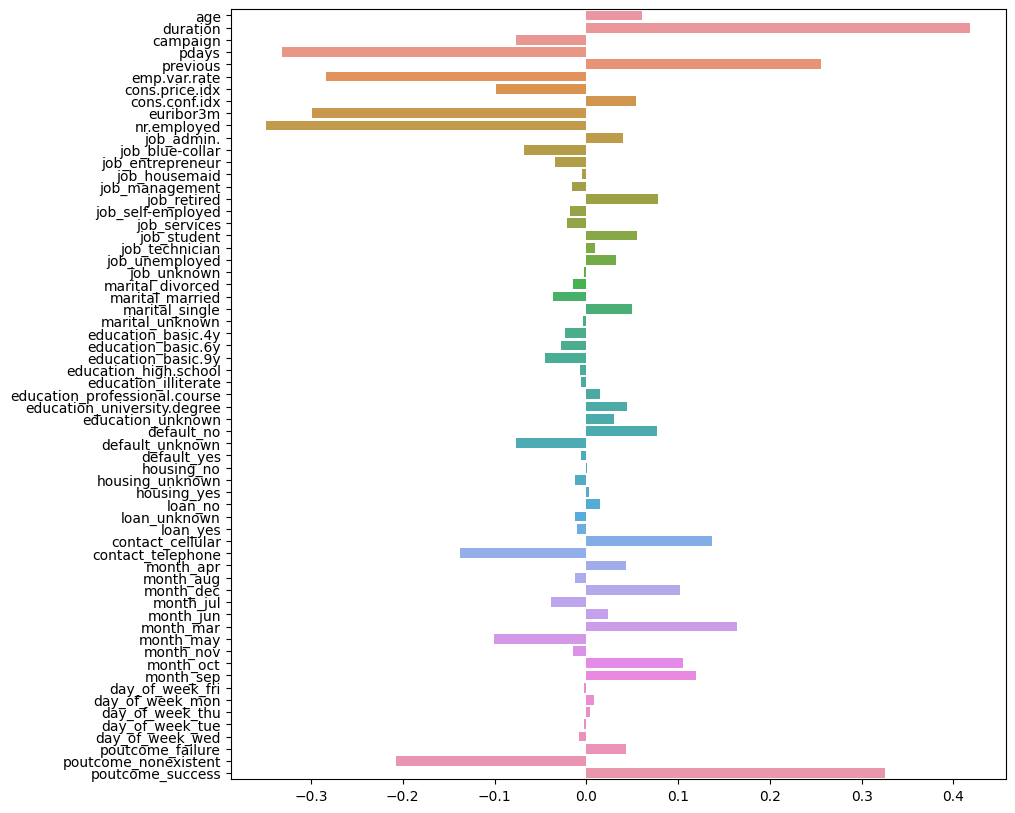

In [4]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.hist(X)
plt.title('Histogram of numeric features')
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.show()

# Get correlations between features and target variable
corr = X.assign(y=y).corr()['y']

# drop last value since it is the correlation with itself
corr = corr[:-1]
ax, fig = plt.subplots(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index)


**What are your takeways from the exploratory data analysis?**

This is a very large data set, and we can see that not every label that was used was signifcant on the correlation with the target values. We can see that the most colerated data was the in the positive x-axis. The larger the value in the positive x-axis, the more significant it was. Contrary, the left side of the x-axis was the least correlated and can get rid of since it is not significant.

The histogram demonstrated how large each feature was. And we can see, just because the features were large doesn't mean they were signicant or hold any correlation with the target value. From here, we can use our methods to determine which labels are most signicant and should be using.



### 4. Split the data into a stratified 80/20 train/test split.

In [5]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 5. Apply feature selection

Use the following feature selection methods:
1. Filter: Variance Threshold with a threshold of 0.1
2. Embedded: Use the LASSO L1 penalty in the LogisticRegressionCV and keep the features with non-zero coefficients
3. Wrapper: Use Recursive Feature Elimination (RFECV) with Logistic Regression as the estimator.
4. Feature Extraction: Use PCA to extract the top 20 components

For the first three feature selection methods, print out the names of the features that were selected.

**Note:** Since this is an imbalanced dataset using the default scoring criterion, which is classification Accuracy, will not yield good results. For that reason, you should use the F1-Score (`scoring='f1'`) whenever you fit a classifier.

In [24]:
# Your code here
# Filter
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)

sel.fit(X_train)
sel.transform(X_train)
sel.get_support(indices=True)

# Print out labels of selected features
print(X_train.columns[sel.get_support(indices=True)])
filterLabels = X_train.columns[sel.get_support(indices=True)]

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_technician', 'marital_married',
       'marital_single', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_aug',
       'month_jul', 'month_jun', 'month_may', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent'],
      dtype='object')


In [25]:
# Embedded
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

print('Intercept:', lr.intercept_)
np.set_printoptions(8)

# Print out labels of selected features
print(X_train.columns[lr.coef_[0]!=0])
embeddedLabels = X_train.columns[lr.coef_[0]!=0]

Training accuracy: 0.9168437025796662
Test accuracy: 0.9199029126213593
Intercept: [-2.28727854]
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced',
       'marital_married', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_professional.course', 'default_no',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'day_of_week_fri', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent'],
      dtype='object')


In [26]:
# Wrapper
from sklearn.feature_selection import RFE

lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', multi_class='ovr')
rfe = RFE(lr, n_features_to_select=20, step=1)

X_train_sub = rfe.fit_transform(X_train, y_train)

In [27]:
rfe.support_
# print out features
print(X_train.columns[rfe.support_])
wrapperLabels = X_train.columns[rfe.support_]

Index(['duration', 'campaign', 'nr.employed', 'job_entrepreneur',
       'job_housemaid', 'job_self-employed', 'job_unknown', 'marital_unknown',
       'default_no', 'default_unknown', 'loan_unknown', 'contact_telephone',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [28]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_train)

X_pca = pca.transform(X_train)
print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (3295, 63)
Reduced shape: (3295, 20)


In [29]:
print("PCA component shape: {}".format(pca.components_.shape))

# Print labels of selected features
print(X_train.columns[pca.components_[0]!=0])
pcaLabels = X_train.columns[pca.components_[0]!=0]

PCA component shape: (20, 63)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_

### 6. Fine Tune a Classification Algorithm

We will use the `GradientBoostingClassifier` which is know to be one of the most powefull ensemble algorithms. Some of the hyperparameters that can be tuned when training a GradientBoostingClassifier are:
- Number of estimators (trees): try 100, 200, 300
- Learning rate: try 0.01, 0.1
- Max (tree) depth: try 3, 4

Use `GridSearchCV` to train your classifier for the different hyperparameter values. Remember to use F1-score as your scoring criterion.

Tune your model on the features selected by each one of the methods above.

In [50]:
# Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1], 'max_depth': [3, 4]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Best cross-validation score:', grid.best_score_)

grid.best_estimator_.score(X_test, y_test)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.5465494739369692


0.9211165048543689

In [51]:
# Tuning for variance filter
filtergrid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='f1')
filtergrid.fit(X_train[filterLabels], y_train)
print("Variance Filter")
print('Best parameters:', filtergrid.best_params_)
print('Best cross-validation score:', grid.best_score_)
print(f"Filter Score: {filtergrid.best_estimator_.score(X_test[filterLabels], y_test)}\n")

# Tuning for embedded
embeddedgrid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='f1')
embeddedgrid.fit(X_train[embeddedLabels], y_train)
print("Embedded")
print('Best parameters:', embeddedgrid.best_params_)
print('Best cross-validation score:', embeddedgrid.best_score_)
print(f"Embedded Score: {embeddedgrid.best_estimator_.score(X_test[embeddedLabels], y_test)}\n")

# Tuning for wrapper
wrappingrid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='f1')
wrappingrid.fit(X_train[wrapperLabels], y_train)
print("Wrapper")
print('Best parameters:', wrappingrid.best_params_)
print('Best cross-validation score:', wrappingrid.best_score_)
print(f"Wrapper Score: {wrappingrid.best_estimator_.score(X_test[wrapperLabels], y_test)}\n")

#Tuning for PCA
pcagrid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='f1')
pcagrid.fit(X_train[pcaLabels], y_train)
print("PCA")
print('Best parameters:', pcagrid.best_params_)
print('Best cross-validation score:', pcagrid.best_score_)
print(f"PCA Score: {pcagrid.best_estimator_.score(X_test[pcaLabels], y_test)}\n")

Variance Filter
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best cross-validation score: 0.5465494739369692
Filter Score: 0.9186893203883495

Embedded
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best cross-validation score: 0.5607920079174329
Embedded Score: 0.9247572815533981

Wrapper
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score: 0.5527269997188012
Wrapper Score: 0.9162621359223301

PCA
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best cross-validation score: 0.550732862463773
PCA Score: 0.9211165048543689



### 7. Evaluate your tuned models on the test data

For each one of the tuned models, print out the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

For the model that produces the best f1-score, print out the confusion matrix and classification report using the skearn `classification_report` function.


In [53]:
# Your code here
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Filter Data
filteraccurcy = filtergrid.best_estimator_.score(X_test[filterLabels], y_test)
filterprecision = precision_score(y_test, filtergrid.best_estimator_.predict(X_test[filterLabels]))
filterrecall = recall_score(y_test, filtergrid.best_estimator_.predict(X_test[filterLabels]))
filterf1 = f1_score(y_test, filtergrid.best_estimator_.predict(X_test[filterLabels]))
filterrocauc = roc_auc_score(y_test, filtergrid.best_estimator_.predict(X_test[filterLabels]))


print(f"Filter Accuracy: {filteraccurcy}")
print(f"Filter Precision: {filterprecision}")
print(f"Filter Recall: {filterrecall}")
print(f"Filter F1: {filterf1}")
print(f"Filter ROC AUC: {filterrocauc}\n")

# Embedded Data
embeddedaccurcy = embeddedgrid.best_estimator_.score(X_test[embeddedLabels], y_test)
embeddedprecision = precision_score(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))
embeddedrecall = recall_score(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))
embeddedf1 = f1_score(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))
embeddedrocauc = roc_auc_score(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))

print(f"Embedded Accuracy: {embeddedaccurcy}")
print(f"Embedded Precision: {embeddedprecision}")
print(f"Embedded Recall: {embeddedrecall}")
print(f"Embedded F1: {embeddedf1}")
print(f"Embedded ROC AUC: {embeddedrocauc}\n")

# Wrapper Data
wrapperaccurcy = wrappingrid.best_estimator_.score(X_test[wrapperLabels], y_test)
wrapperprecision = precision_score(y_test, wrappingrid.best_estimator_.predict(X_test[wrapperLabels]))
wrapperrecall = recall_score(y_test, wrappingrid.best_estimator_.predict(X_test[wrapperLabels]))
wrapperf1 = f1_score(y_test, wrappingrid.best_estimator_.predict(X_test[wrapperLabels]))
wrapperroc = roc_auc_score(y_test, wrappingrid.best_estimator_.predict(X_test[wrapperLabels]))

print(f"Wrapper Accuracy: {wrapperaccurcy}")
print(f"Wrapper Precision: {wrapperprecision}")
print(f"Wrapper Recall: {wrapperrecall}")
print(f"Wrapper F1: {wrapperf1}")
print(f"Wrapper ROC AUC: {wrapperroc}\n")

# PCA Data
pcaaccurcy = pcagrid.best_estimator_.score(X_test[pcaLabels], y_test)
pcaprecision = precision_score(y_test, pcagrid.best_estimator_.predict(X_test[pcaLabels]))
pcarecall = recall_score(y_test, pcagrid.best_estimator_.predict(X_test[pcaLabels]))
pcaf1 = f1_score(y_test, pcagrid.best_estimator_.predict(X_test[pcaLabels]))
pcaroc = roc_auc_score(y_test, pcagrid.best_estimator_.predict(X_test[pcaLabels]))

print(f"PCA Accuracy: {pcaaccurcy}")
print(f"PCA Precision: {pcaprecision}")
print(f"PCA Recall: {pcarecall}")
print(f"PCA F1: {pcaf1}")
print(f"PCA ROC AUC: {pcaroc}\n")

print(f"Best f1 score: {max(filterf1, embeddedf1, wrapperf1, pcaf1)} which is the embedded method")
embededmatrix = confusion_matrix(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))
embeddedreport = classification_report(y_test, embeddedgrid.best_estimator_.predict(X_test[embeddedLabels]))

print(f"Filter Confusion Matrix: {embededmatrix}")


Filter Accuracy: 0.9186893203883495
Filter Precision: 0.5657894736842105
Filter Recall: 0.5584415584415584
Filter F1: 0.5620915032679739
Filter ROC AUC: 0.7571324258071246

Embedded Accuracy: 0.9247572815533981
Embedded Precision: 0.6119402985074627
Embedded Recall: 0.5324675324675324
Embedded F1: 0.5694444444444444
Embedded ROC AUC: 0.7488308211199777

Wrapper Accuracy: 0.9162621359223301
Wrapper Precision: 0.5625
Wrapper Recall: 0.4675324675324675
Wrapper F1: 0.5106382978723405
Wrapper ROC AUC: 0.7150246005667692

PCA Accuracy: 0.9211165048543689
PCA Precision: 0.5909090909090909
PCA Recall: 0.5064935064935064
PCA F1: 0.5454545454545454
PCA ROC AUC: 0.7351744640901268

Best f1 score: 0.5694444444444444 which is the embedded method
Filter Confusion Matrix: [[721  26]
 [ 36  41]]


In [54]:
print(f"Filter Classification Report: {embeddedreport}")

Filter Classification Report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96       747
           1       0.61      0.53      0.57        77

    accuracy                           0.92       824
   macro avg       0.78      0.75      0.76       824
weighted avg       0.92      0.92      0.92       824



### 8. Discuss your results

**What are your main takeaways from this assignment?**

Depending on the data, and the features, the best model will vary. In our case, I feel like the models were pretty even. We can probably adjust it some more and get different results, but I found the most consistent model was the embedded method. Although, the PCA method was also a pretty good one at times. I got different results on different runs, but the embedded method was the most consistent with PCA second. It's also important to understand not only the f1 score, but the other metrics as well. Accuracy, percision, recall, and ROC-AUC are all also important and depending on the data, what we're looking for, we should consider those metrics as well. A good indictator as well is when multiple models are using same labels or similar labels. A good indicator that we should focus on those labels.